<a href="https://colab.research.google.com/github/JakubChmielewskiRepo/175IC-machine-learning/blob/main/lab3ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int

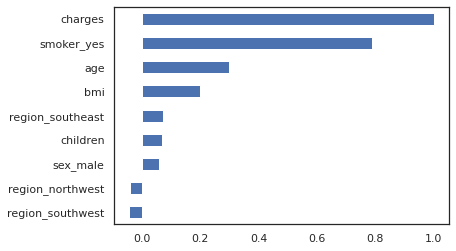

In [ ]:
import numpy as np
from numpy import reshape
import random
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import sys
df_raw=pd.read_csv('https://storage.googleapis.com/esmartdata-courses-files/ml-course/insurance.csv')
df_raw.head()

df=df_raw.copy()
df.info()

df[df.duplicated()]
df.drop_duplicates()
df.info()

df.isnull().sum()
df.columns
for col in ['sex', 'smoker', 'region']:
  df[col] = df[col].astype('category')
df.info()

df.sex.value_counts()
#df.sex.value_counts().plot(kind='pie')

df.smoker.value_counts()

#df.charges.plot(kind='hist', bins=30)

#px.histogram(df,x='charges',width=700,height=400,nbins=50, facet_col='smoker',facet_row='sex')

df_dummies=pd.get_dummies(df,drop_first=True)
df_dummies

corr=df_dummies.corr()
corr

# sns.set(style="white")
# mask=np.zeros_like(corr)
# mask[np.triu_indices_from(mask)]=1
# plt.subplots(figsize=(10,10))
# cmap=sns.diverging_palette(200,10)
#sns.heatmap(corr,mask=mask,cmap=cmap,vmax=0.25,vmin=-0.25)

df_dummies.corr()['charges'].sort_values(ascending=False)
df_dummies.corr()['charges'].sort_values().plot(kind='barh')

x1 = df_dummies['charges']
y1 = df_dummies.drop(columns='charges')
X_train,X_test,y_train,y_test = train_test_split(y1,x1,test_size=0.2)

regressor=LinearRegression()
regressor.fit(X_train,y_train)

print(f'R2 score: {regressor.score(X_test,y_test):.4f}')

y_pred=regressor.predict(X_test)
y_pred[:10]

y_true = y_test.copy()
predictions = pd.DataFrame(data={'y_true': y_true, 'y_pred': y_pred})
predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions.head()
#predictions.error.plot(kind='hist',bins=30)

mae=mean_absolute_error(y_true,y_pred)
print(f'MAE wynosi: {mae:.2f}')

X_train_ols=sm.add_constant(X_train.values)
ols=sm.OLS(endog=y_train,exog=X_train_ols).fit()
predictors=['const']+list(X_train.columns)
print(ols.summary(xname=predictors))

df_dummies2 = df_dummies.drop(columns=["sex_male", "region_southeast",'region_southwest','region_northwest',   ])
x2 = df_dummies2['charges']
y2 = df_dummies2.drop(columns='charges')
X_train,X_test,y_train,y_test = train_test_split(y2,x2,test_size=0.2)

regressor2=LinearRegression()
regressor2.fit(X_train,y_train)
print(f'R2 score: {regressor2.score(X_test,y_test):.4f}')

y_pred=regressor2.predict(X_test)
y_pred[:10]

y_true = y_test.copy()
predictions = pd.DataFrame(data={'y_true': y_true, 'y_pred': y_pred})
predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions.head()

#predictions.error.plot(kind='hist',bins=30)

mae2=mean_absolute_error(y_true,y_pred)
print(f'MAE2 wynosi: {mae2:.2f}')

X_train_ols=sm.add_constant(X_train.values)
ols=sm.OLS(endog=y_train,exog=X_train_ols).fit()
predictors=['const']+list(X_train.columns)
print(ols.summary(xname=predictors))



size_before = sys.getsizeof(df_dummies)
print(f'Size before: {size_before}')
size_after = sys.getsizeof(df_dummies2)
print(f'Size after: {size_after}')

print(f'Saved place {100-(size_after/size_before * 100)}% ')